<a href="https://colab.research.google.com/github/Simpleshell3/CMR-Land-Sector-Analysis/blob/main/Littoral_Cameroon_Land_Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Littoral Cameroon Land Sector Analysis

The aim of this exercise is to provide an extensive report on Land use in Littoral Cameroon as well as outline the various strategies that can be adopted to mitigate and climate change, provide food security and promote biodiversity. 

The Littoral Region (French: Région du Littoral) is a region of Cameroon. Its capital is Douala. As of 2004, its population was 3,174,437. Its name is due to the region being largely littoral, and associated with the sea coast.

In [ ]:
# Installing packages
!pip install geopandas 
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install mapclassify
!pip install geoplot
!pip install seaborn
!pip install rasterio
!pip install folium
!pip install ipyleaflet

In [2]:
#Importing packages
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import mapclassify
from mpl_toolkits.basemap import Basemap
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import seaborn as sns
import io
import requests
import rasterio
from rasterio.plot import show
import folium

%matplotlib inline

## Administrative boundary of Littoral Cameroon

The region is divided into four departments (départements):

1. Moungo, with its capital at Nkongsamba.
2. Nkam, with its capital at Yabassi.
3. Sanaga-Maritime, with its capital at Édéa.
4. Wouri, forming the area around the major city of Douala.

These are in turn broken down into subdivisions. Presidentially appointed senior divisional officers (préfets) and subdivisional officers (sous-préfets) govern each. Traditional leaders, usually referred to as chiefs in English, often preside over particular ethnic groups or villages; nevertheless, many of these wield very little power today.

In [3]:
# Downloading and displaying Littoral Cameroon's Adminitrative Boundaries
url1 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Littoral.json"

a=requests.get(url1).content

df_lcbo = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_lcbo

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,CMR,CM-LT,Littoral,Littoral,Littoral,,administrative,4,Q845172,fr:Région du Littoral,2019-02-26T08:00:07,"MULTIPOLYGON (((9.66296 3.84560, 9.66230 3.845..."


In [4]:
m = folium.Map(
    location=[4, 14],
    tiles="cartodbpositron",
    zoom_start=7,
)

folium.GeoJson(url1, name="adminlevel").add_to(m)

folium.LayerControl().add_to(m)


m

In [5]:
# Downloading and displaying Littoral Cameroon's Ecological Zones
url2 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Littoral_GEZ.json"

a=requests.get(url2).content

df_lcgez = gpd.read_file(io.StringIO(a.decode('utf-8')))

df_lcgez

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM-LT,Littoral,Tropical mountain system,16,TM,4,"MULTIPOLYGON (((9.84789 5.33234, 9.84736 5.332..."
1,CMR,CM-LT,Littoral,Tropical rainforest,11,TAr,4,"MULTIPOLYGON (((10.19251 4.99928, 10.19170 4.9..."


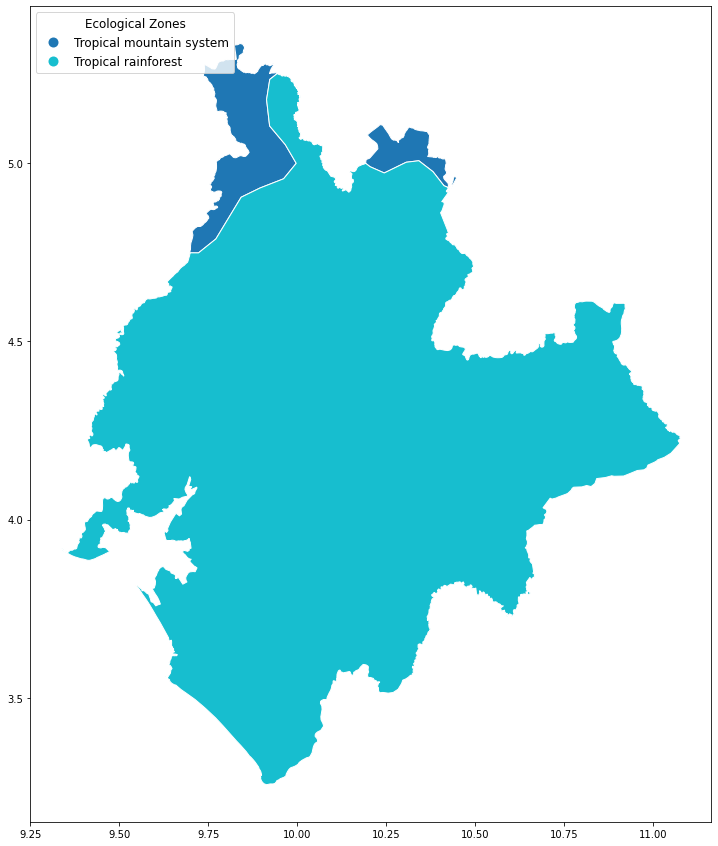

In [6]:
df_lcgez.plot(figsize= (15,15), column='gez_name', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Ecological Zones", "title_fontsize":"large"})
plt.show()

Littoral Cameroon is made up of two Ecological Zones.

1. Tropical Mountain System

The climate in the mountain areas varies enormously due to different exposure to the wind direction and variation in altitude. Wind exposed areas are normally wet or pluvial while the interior valleys are usually moist or dry.

2. Tropical Rainforests

Tropical rainforests exhibit **high levels of biodiversity**. Around 40% to 75% of all biotic species are indigenous to the rainforests. Rainforests are home to half of all the living animal and plant species on the planet. Two-thirds of all flowering plants can be found in rainforests. A single hectare of rainforest may contain 42,000 different species of insect, up to 807 trees of 313 species and 1,500 species of higher plants. Tropical rainforests have been called the "world's largest pharmacy", because over one quarter of natural medicines have been discovered within them.It is likely that there may be many millions of species of plants, insects and microorganisms still undiscovered in tropical rainforests.

In [7]:
# Downloading and displaying Littoral Cameroon's Soil Resources
url3 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Littoral_WSR.json"

a=requests.get(url3).content

df_lcwsr = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_lcwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,CMR,CM-LT,Littoral,AC,23,Acrisol,4,"MULTIPOLYGON (((9.84789 5.33234, 9.84736 5.332..."
1,CMR,CM-LT,Littoral,AN,4,Andosol,4,"POLYGON ((9.64471 3.98633, 9.67409 4.04877, 9...."
2,CMR,CM-LT,Littoral,FR,26,Ferralsol,4,"POLYGON ((10.23202 3.51415, 10.24148 3.51512, ..."


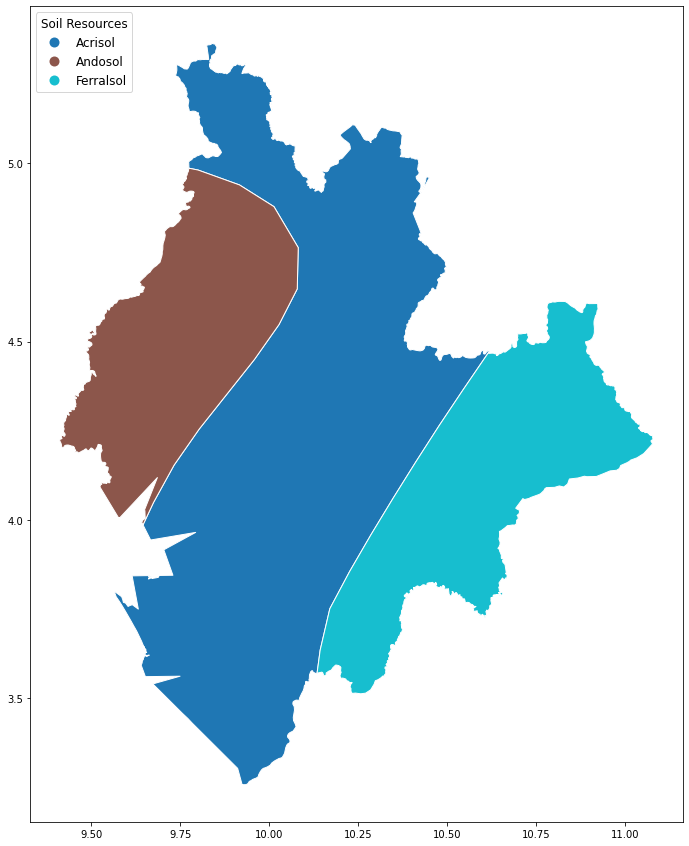

In [8]:
df_lcwsr.plot(figsize= (15,15), column='IPCC', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Soil Resources", "title_fontsize":"large"})
plt.show()

In [ ]:
# Downloading and displaying Centre Cameroon's Managed Forest Concessions
url4 = "https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/ManagedForestConcessions/ManagedForestConcessions_CMR.geojson"

a=requests.get(url4).content

df_lcmfc = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_lcmfc

In [ ]:
df_lcmfc1 = pd.merge(df_lcbo, df_lcmfc, how='outer', on = 'geometry')
df_lcmfc1

In [15]:
df_lcmfc2 = df_lcmfc1.loc[df_lcmfc1['province'] == 'littoral'] 
df_lcmfc2 = pd.merge(df_lcbo, df_lcmfc2, how='outer', on = 'geometry')
df_lcmfc2

,country,ISO3166_2_x,name,enname_x,locname_x,offname_x,boundary_x,adminlevel_x,wikidata_x,wikimedia_x,timestamp_x,geometry,country_x,ISO3166_2_y,name_x,enname_y,locname_y,offname_y,boundary_y,adminlevel_y,wikidata_y,wikimedia_y,timestamp_y,id,OBJECTID,country_y,name_y,company,group_comp,group_coun,legal_term,status,province,source,last_updat,Shape_Leng,AREA_GEO,Shape_Length,Shape_Area
0,CMR,CM-LT,Littoral,Littoral,Littoral,,administrative,4,Q845172,fr:Région du Littoral,2019-02-26T08:00:07,"MULTIPOLYGON (((9.66296 3.84560, 9.66230 3.845...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#bins = list(df_ecgez["gez_code"].quantile([0, 0.03, 0.06, 0.11, 0.12]))
m = folium.Map(location=[4, 14], zoom_start=8)

folium.Choropleth(
    geo_data=df_lcmfc2,
    name = "chloropleth",
    data=df_lcmfc1,
    columns=["Shape_Area","Shape_Leng"],
    #key_on="feature.id",
    fill_color="Greens",
    fill_opacity=0.5,
    line_opacity=2.5,
    legend_name="CC MFC",
    #bins=bins,
    #reset=True,
).add_to(m)

m